In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv(r'E:\Innomatics_Internship_APR_21\Recommender_sys_project\kaggle\kaggle_visible_evaluation_triplets.txt',sep='\t',names=['user_id','song_id','freq'])
df.head()

,user_id,song_id,freq
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1


In [5]:
df.tail()

,user_id,song_id,freq
1450928,5e650759ebf89012044c6d52121eeada8b0ec814,SOVLNXV12A6D4F706E,1
1450929,5e650759ebf89012044c6d52121eeada8b0ec814,SOVDSJC12A58A7A271,2
1450930,5e650759ebf89012044c6d52121eeada8b0ec814,SOBRHVR12A8C133F35,2
1450931,5e650759ebf89012044c6d52121eeada8b0ec814,SOMGVYU12A8C1314FF,2
1450932,5e650759ebf89012044c6d52121eeada8b0ec814,SOTCMDJ12A6D4F8528,3


In [6]:
df.describe()

,freq
count,1.450933e+06
mean,3.187149e+00
std,7.051664e+00
min,1.000000e+00
25%,1.000000e+00
50%,1.000000e+00
75%,3.000000e+00
max,9.230000e+02


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450933 entries, 0 to 1450932
Data columns (total 3 columns):
 #   Column   Non-Null Count    Dtype 
---  ------   --------------    ----- 
 0   user_id  1450933 non-null  object
 1   song_id  1450933 non-null  object
 2   freq     1450933 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 33.2+ MB


In [4]:
detail_df=pd.read_csv(r'E:\Innomatics_Internship_APR_21\Recommender_sys_project\kaggle\unique_tracks.txt',sep='<SEP>',names=['track_id','song_id','artist_name','release'])
detail_df.head()

,track_id,song_id,artist_name,release
0,TRMMMYQ128F932D901,SOQMMHC12AB0180CB8,Faster Pussy cat,Silent Night
1,TRMMMKD128F425225D,SOVFVAK12A8C1350D9,Karkkiautomaatti,Tanssi vaan
2,TRMMMRX128F93187D9,SOGTUKN12AB017F4F1,Hudson Mohawke,No One Could Ever
3,TRMMMCH128F425532C,SOBNYVR12A8C13558C,Yerba Brava,Si Vos Querés
4,TRMMMWA128F426B589,SOHSBXH12A8C13B0DF,Der Mystic,Tangle Of Aspens


In [14]:
detail_df.shape

(1000000, 4)

In [15]:
detail_df.tail()

,track_id,song_id,artist_name,release
999995,TRYYYUS12903CD2DF0,SOTXAME12AB018F136,Kiko Navarro,O Samba Da Vida
999996,TRYYYJO128F426DA37,SOXQYIQ12A8C137FBB,Kuldeep Manak,Jago Chhadeo
999997,TRYYYMG128F4260ECA,SOHODZI12A8C137BB3,Gabriel Le Mar,Novemba
999998,TRYYYDJ128F9310A21,SOLXGOR12A81C21EB7,Elude,Faraday
999999,TRYYYVU12903CD01E3,SOWXJXQ12AB0189F43,Texta,Fernweh feat. Sektion Kuchikäschtli


In [5]:
print(sum(df.isnull().any()),sum(detail_df.isnull().any()))

0 1


In [6]:
df.isnull().sum()

user_id    0
song_id    0
freq       0
dtype: int64

In [5]:
detail_df.isnull().sum()

track_id        0
song_id         0
artist_name     0
release        15
dtype: int64

In [8]:
print("number of null values {}".format(sum(detail_df.duplicated())))

number of null values 0


In [6]:
detail_df=detail_df.dropna()

In [7]:
detail_df.shape

(999985, 4)

In [8]:
detail_df.isnull().sum()

track_id       0
song_id        0
artist_name    0
release        0
dtype: int64

In [23]:
detail_df.head()

,track_id,song_id,artist_name,release
0,TRMMMYQ128F932D901,SOQMMHC12AB0180CB8,Faster Pussy cat,Silent Night
1,TRMMMKD128F425225D,SOVFVAK12A8C1350D9,Karkkiautomaatti,Tanssi vaan
2,TRMMMRX128F93187D9,SOGTUKN12AB017F4F1,Hudson Mohawke,No One Could Ever
3,TRMMMCH128F425532C,SOBNYVR12A8C13558C,Yerba Brava,Si Vos Querés
4,TRMMMWA128F426B589,SOHSBXH12A8C13B0DF,Der Mystic,Tangle Of Aspens


In [9]:
song_df=pd.merge(df,detail_df,on='song_id')
song_df.head()
### we need to merge the two data frames

,user_id,song_id,freq,track_id,artist_name,release
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1,TRAEHHJ12903CF492F,Dwight Yoakam,You're The One
1,c34670d9c1718361feb93068a853cead3c95b76a,SOBONKR12A58A7A7E0,1,TRAEHHJ12903CF492F,Dwight Yoakam,You're The One
2,c5006d9f41f68ccccbf5ee29212b6af494110c5e,SOBONKR12A58A7A7E0,1,TRAEHHJ12903CF492F,Dwight Yoakam,You're The One
3,e4332e11f4df6dd26673bb6b085e9a2bbdc9b8a5,SOBONKR12A58A7A7E0,2,TRAEHHJ12903CF492F,Dwight Yoakam,You're The One
4,baf2fe5885ab93fbbdb7fecc6691788e70afb6c8,SOBONKR12A58A7A7E0,4,TRAEHHJ12903CF492F,Dwight Yoakam,You're The One


In [25]:
song_df.shape

(1491951, 6)

# Basic Statistics

In [26]:
print('Total Data Points',song_df.shape[0])
print('Total NO of users',song_df['user_id'].unique().shape[0])
print('Total number of songs',song_df['song_id'].unique().shape[0])
print('Total number of Tracks',song_df['track_id'].unique().shape[0])


Total Data Points 1491951
Total NO of users 110000
Total number of songs 163205
Total number of Tracks 163827


In [27]:
print('Number of unique release',song_df['release'].unique().shape[0])
print('Number of unique artists',song_df['artist_name'].unique().shape[0])

Number of unique release 137670
Number of unique artists 28366


In [28]:
song_df.describe()

,freq
count,1.491951e+06
mean,3.179720e+00
std,7.015025e+00
min,1.000000e+00
25%,1.000000e+00
50%,1.000000e+00
75%,3.000000e+00
max,9.230000e+02


# Distribution of Frequency column

<AxesSubplot:xlabel='freq', ylabel='Density'>

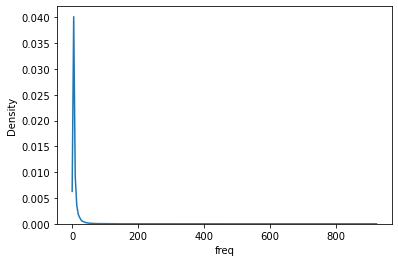

In [29]:
#normal distribution of freq
sns.kdeplot(data=song_df,x='freq')

# Number of songs listened per user

In [31]:
#groupby code
#using user_id,song_id
songs_per_user=song_df.groupby(['user_id'])["user_id"].value_counts()

In [32]:
songs_per_user.sort_values().head()

user_id                                   user_id                                 
b4f681dac463c297568bffe7f4b646b74a5e6d0d  b4f681dac463c297568bffe7f4b646b74a5e6d0d    5
1691b9058739f0b88ac2777e5bbffe0e1d400f2d  1691b9058739f0b88ac2777e5bbffe0e1d400f2d    5
d1764e1f4626164793d400b95efb4a5f80a06cf9  d1764e1f4626164793d400b95efb4a5f80a06cf9    5
d1776bb80cf8298288974c52f903cc3b9601761a  d1776bb80cf8298288974c52f903cc3b9601761a    5
98d00906e235bede8d2b14b9cf5b802ee2438231  98d00906e235bede8d2b14b9cf5b802ee2438231    5
Name: user_id, dtype: int64

In [33]:
songs_per_user.sort_values().tail()

user_id                                   user_id                                 
016a24e91a72c159a5048ab1b9b2ba5ce761b526  016a24e91a72c159a5048ab1b9b2ba5ce761b526    54
3233c598c50f0ddbd351504e773cd51de79691db  3233c598c50f0ddbd351504e773cd51de79691db    55
d30e18323f15426c3cdc8585252ed34459916f51  d30e18323f15426c3cdc8585252ed34459916f51    55
ad4b2717e89766b66b96fe52a38736116e315874  ad4b2717e89766b66b96fe52a38736116e315874    57
316110734d8da7478cc33237458814f770a9eb7a  316110734d8da7478cc33237458814f770a9eb7a    57
Name: user_id, dtype: int64

In [34]:
songs_per_user.describe()

count    110000.000000
mean         13.563191
std           8.321649
min           5.000000
25%           7.000000
50%          11.000000
75%          18.000000
max          57.000000
Name: user_id, dtype: float64

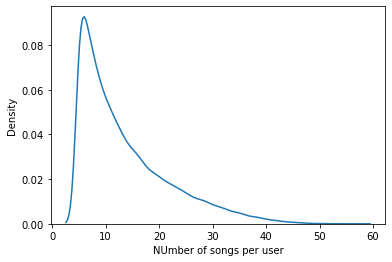

In [35]:
plt.xlabel('NUmber of songs per user')
sns.kdeplot(songs_per_user)
plt.show()

# Analysis of popular artist

In [36]:
#group by
#artistname and userid
artist_popularity=song_df.groupby(['artist_name'])['artist_name'].value_counts()

In [37]:
artist_popularity.sort_values().head()

artist_name                     artist_name                   
Özlem Tekin                     Özlem Tekin                       1
Nightmares On Wax feat. OC      Nightmares On Wax feat. OC        1
Hilt                            Hilt                              1
CLP feat. Spoek                 CLP feat. Spoek                   1
Hilltop Hoods / Pharoahe Monch  Hilltop Hoods / Pharoahe Monch    1
Name: artist_name, dtype: int64

In [38]:
artist_popularity.sort_values().tail()

artist_name             artist_name           
Eminem                  Eminem                     8160
Florence + The Machine  Florence + The Machine     8213
Justin Bieber           Justin Bieber              9259
Kings Of Leon           Kings Of Leon             11586
Coldplay                Coldplay                  13675
Name: artist_name, dtype: int64

In [39]:
# looking at cold play releases
song_df[song_df['artist_name']=='Coldplay']['release'].unique()

array(['Yellow', 'The Scientist', 'Fix You', "Don't Panic", 'Sparks',
       'Clocks', 'Life In Technicolor ii', 'Such A Rush',
       'Fix You (Live)', 'Speed Of Sound', 'Lost!',
       'God Put A Smile Upon Your Face', 'Brothers & Sisters',
       'A Rush Of Blood To The Head', 'Clocks (Live In Sydney)',
       'One I Love', 'For You', 'You Only Live Twice (Live From Norway)',
       'Shiver', 'Swallowed In The Sea', 'In My Place',
       'Postcards From Far Away', 'Glass Of Water',
       "Things I Don't Understand", 'Strawberry Swing', '42',
       'Til Kingdom Come', 'The Goldrush', 'X & Y', 'Life In Technicolor',
       'We Never Change', 'Bigger Stronger', 'What If', 'Trouble',
       "Everything's Not Lost (Includes Hidden Track 'Life Is For Living')",
       'Only Superstition', 'Politik', 'Careful Where You Stand',
       'Warning Sign', 'See You Soon', 'Spies', 'Cemeteries Of London',
       'A Whisper', 'A Message', 'Square One', 'Low', 'I Bloom Blaum',
       'I Ran Away',

In [41]:
# looking at justin beiber releases
song_df[song_df['artist_name']=='Justin Bieber']['release'].unique()

array(['Somebody To Love', 'Down To Earth', 'One Time', 'U Smile',
       'Favorite Girl', 'Love Me', 'Common Denominator',
       'Never Let You Go', 'Stuck In The Moment', 'Up',
       'One Less Lonely Girl', 'That Should Be Me', 'Bigger',
       'Runaway Love'], dtype=object)

In [42]:
sorted_artist_popularity=artist_popularity.sort_values(ascending=False)

Text(0.5, 1.0, 'Popularity and Artist')

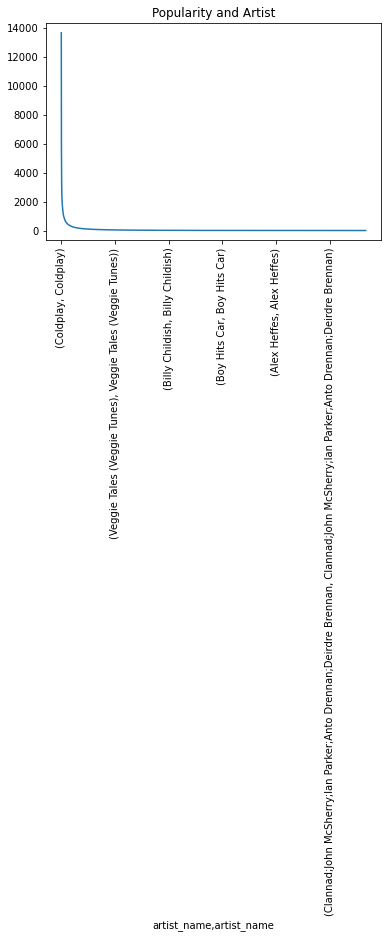

In [44]:
# plotting of popularity and artist
sorted_artist_popularity.plot.line()
plt.xticks(rotation=90)
plt.title('Popularity and Artist')

# Analysis of popularity song

In [45]:
# using release and userid
song_popularity=song_df.groupby(['release'])['release'].value_counts()

In [46]:
song_popularity.sort_values().head()

release                    release                  

Ef Ég Hefði Aldrei...     
Ef Ég Hefði Aldrei...       1
Makin' me hot              Makin' me hot                1
Makin' Money               Makin' Money                 1
Makin' Magic               Makin' Magic                 1
Makin' Love To A Murderer  Makin' Love To A Murderer    1
Name: release, dtype: int64

In [47]:
song_popularity.sort_values().tail()

release                         release                       
Dog Days Are Over (Radio Edit)  Dog Days Are Over (Radio Edit)    3780
Use Somebody                    Use Somebody                      3822
You're The One                  You're The One                    4270
Undo                            Undo                              4483
Sehr kosmisch                   Sehr kosmisch                     5043
Name: release, dtype: int64

In [48]:
sorted_song_popularity=song_popularity.sort_values(ascending=False)

Text(0.5, 1.0, 'popularity and song')

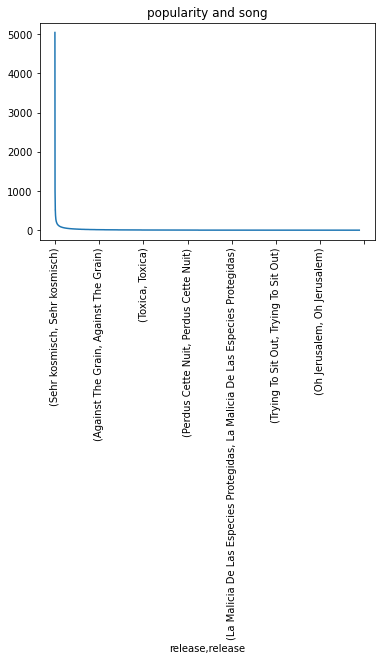

In [50]:
# plot betweeen popularity and song
sorted_song_popularity.plot.line()
plt.xticks(rotation=90)
plt.title('popularity and song')

In [51]:
song_df.columns

Index(['user_id', 'song_id', 'freq', 'track_id', 'artist_name', 'release'], dtype='object')

In [70]:
repeated=song_df.groupby(['freq'])['song_id'].value_counts()

In [71]:
repeated

freq  song_id           
1     SOFRQTD12A81C233C0    2149
      SOWCKVR12A8C142411    2040
      SOAXGDH12A8C13F8A1    1693
      SODGVGW12AC9075A8D    1616
      SOAUWYT12A81C206F1    1597
                            ... 
537   SOFVLYV12A8C145D8F       1
582   SONGOJV12AF729AEBD       1
597   SOAOXTG12A67021AA7       1
646   SOPMHHE12AB01845F6       1
923   SOXTUWG12AB018A2E2       1
Name: song_id, Length: 406253, dtype: int64

(array([-50.,   0.,  50., 100., 150., 200., 250., 300., 350.]),
 [Text(-50.0, 0, '(270, 270)'),
  Text(0.0, 0, '(1, 1)'),
  Text(50.0, 0, '(51, 51)'),
  Text(100.0, 0, '(101, 101)'),
  Text(150.0, 0, '(151, 151)'),
  Text(200.0, 0, '(202, 202)'),
  Text(250.0, 0, '(273, 273)'),
  Text(300.0, 0, ''),
  Text(350.0, 0, '')])

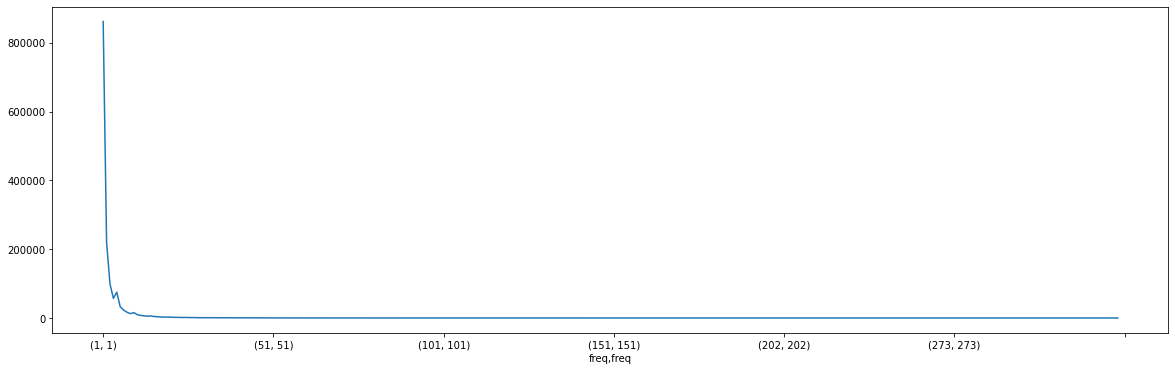

In [65]:
repeated.plot.line()
plt.xticks(rotation=0)

In [67]:
repeated.dtype

dtype('int64')

In [72]:
song_df.columns

Index(['user_id', 'song_id', 'freq', 'track_id', 'artist_name', 'release'], dtype='object')

# Data Preprocessing

In [44]:
song_df['song']=song_df['release']+'-'+song_df['artist_name']
song_df.head()

,user_id,song_id,freq,track_id,artist_name,release,song
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1,TRAEHHJ12903CF492F,Dwight Yoakam,You're The One,You're The One-Dwight Yoakam
1,c34670d9c1718361feb93068a853cead3c95b76a,SOBONKR12A58A7A7E0,1,TRAEHHJ12903CF492F,Dwight Yoakam,You're The One,You're The One-Dwight Yoakam
2,c5006d9f41f68ccccbf5ee29212b6af494110c5e,SOBONKR12A58A7A7E0,1,TRAEHHJ12903CF492F,Dwight Yoakam,You're The One,You're The One-Dwight Yoakam
3,e4332e11f4df6dd26673bb6b085e9a2bbdc9b8a5,SOBONKR12A58A7A7E0,2,TRAEHHJ12903CF492F,Dwight Yoakam,You're The One,You're The One-Dwight Yoakam
4,baf2fe5885ab93fbbdb7fecc6691788e70afb6c8,SOBONKR12A58A7A7E0,4,TRAEHHJ12903CF492F,Dwight Yoakam,You're The One,You're The One-Dwight Yoakam


In [74]:
song_grouped=song_df.groupby(['release']).agg({'freq':'count'}).reset_index()

In [75]:
song_grouped.head()

,release,freq
0,Ef Ég Hefði Aldrei...,1
1,Light Mass Prayers,4
2,"The Arsonist Story"": Evil Craves Attention/O...",1
3,Ég Átti Gráa Æsku,4
4,(Jack The Stripper),2


In [77]:
grouped_sum=song_grouped['freq'].sum()
song_grouped['percentage']=(song_grouped['freq']/grouped_sum)*100
song_grouped.sort_values(['freq','release'],ascending=[0,1])

,release,freq,percentage
98845,Sehr kosmisch,5043,0.338014
125437,Undo,4483,0.300479
136114,You're The One,4270,0.286202
126033,Use Somebody,3822,0.256175
28727,Dog Days Are Over (Radio Edit),3780,0.253360
...,...,...,...
137656,Último Desejo,1,0.000067
137658,Über Grenzen Geh'n,1,0.000067
137660,Übers Geld (Skit),1,0.000067
137662,Üdvözöl A Pokol,1,0.000067


---  
# Popularity based Recommendation  
---

## Get a count of user_ids for each unique song as recommendation score


In [22]:
song_df_grouped = song_df.groupby(['release']).agg({'user_id': 'count'}).reset_index()
song_df_grouped.rename(columns = {'user_id': 'score'},inplace=True)
song_df_grouped
    
        

,release,score
0,Ef Ég Hefði Aldrei...,1
1,Light Mass Prayers,4
2,"The Arsonist Story"": Evil Craves Attention/O...",1
3,Ég Átti Gráa Æsku,4
4,(Jack The Stripper),2
...,...,...
137665,Þú ert jörðin,2
137666,Þú ert sólin,2
137667,ça Me Fait Du Bien,2
137668,étienne d'août,4


## Sort the songs based upon recommendation score


In [15]:
song_df_sort = song_df_grouped.sort_values(['score','release'], ascending = [0,1])
song_df_sort.head()
    
        

,release,score
98845,Sehr kosmisch,5043
125437,Undo,4483
136114,You're The One,4270
126033,Use Somebody,3822
28727,Dog Days Are Over (Radio Edit),3780


## Generate a recommendation rank based upon score


In [18]:
song_df_sort['Rank'] = song_df_sort['score'].rank(ascending=0, method='first')
song_df_sort.head(10)
        

,release,score,Rank
98845,Sehr kosmisch,5043,1.0
125437,Undo,4483,2.0
136114,You're The One,4270,3.0
126033,Use Somebody,3822,4.0
28727,Dog Days Are Over (Radio Edit),3780,5.0
94015,Revelry,3672,6.0
98618,Secrets,3456,7.0
49077,Horn Concerto No. 4 in E flat K495: II. Romanc...,3272,8.0
104367,Somebody To Love,3263,9.0
47699,Hey_ Soul Sister,2791,10.0


## Making Recommendations

In [27]:
user_recommendations=song_df_sort.head(10)
i=int(input('Enter the user index'))
user_id=song_df['user_id'][i]
user_recommendations['user_id'] = user_id
user_recommendations
    

Enter the user index5


,release,score,Rank,user_id
98845,Sehr kosmisch,5043,1.0,f6e34f0a68d5ea1344511e33486f956de361db78
125437,Undo,4483,2.0,f6e34f0a68d5ea1344511e33486f956de361db78
136114,You're The One,4270,3.0,f6e34f0a68d5ea1344511e33486f956de361db78
126033,Use Somebody,3822,4.0,f6e34f0a68d5ea1344511e33486f956de361db78
28727,Dog Days Are Over (Radio Edit),3780,5.0,f6e34f0a68d5ea1344511e33486f956de361db78
94015,Revelry,3672,6.0,f6e34f0a68d5ea1344511e33486f956de361db78
98618,Secrets,3456,7.0,f6e34f0a68d5ea1344511e33486f956de361db78
49077,Horn Concerto No. 4 in E flat K495: II. Romanc...,3272,8.0,f6e34f0a68d5ea1344511e33486f956de361db78
104367,Somebody To Love,3263,9.0,f6e34f0a68d5ea1344511e33486f956de361db78
47699,Hey_ Soul Sister,2791,10.0,f6e34f0a68d5ea1344511e33486f956de361db78


## Overall code using class and objects

In [24]:
import numpy as np
import pandas

#Class for Popularity based Recommender System model
class popularity_recommender_py():
    def __init__(self):
        self.train_data = None
        self.user_id = None
        self.item_id = None
        self.popularity_recommendations = None
        
    #Create the popularity based recommender system model
    def create(self, train_data, user_id, item_id):
        self.train_data = train_data
        self.user_id = user_id
        self.item_id = item_id

        #Get a count of user_ids for each unique song as recommendation score
        train_data_grouped = train_data.groupby([self.item_id]).agg({self.user_id: 'count'}).reset_index()
        train_data_grouped.rename(columns = {'user_id': 'score'},inplace=True)
    
        #Sort the songs based upon recommendation score
        train_data_sort = train_data_grouped.sort_values(['score', self.item_id], ascending = [0,1])
    
        #Generate a recommendation rank based upon score
        train_data_sort['Rank'] = train_data_sort['score'].rank(ascending=0, method='first')
        
        #Get the top 10 recommendations
        self.popularity_recommendations = train_data_sort.head(10)
        print(train_data_sort.head(10))

    #Use the popularity based recommender system model to
    #make recommendations
    def recommend(self, user_id):    
        user_recommendations = self.popularity_recommendations
        
        #Add user_id column for which the recommendations are being generated
        user_recommendations['user_id'] = user_id
    
        #Bring user_id column to the front
        cols = user_recommendations.columns.tolist()
        cols = cols[-1:] + cols[:-1]
        user_recommendations = user_recommendations[cols]
        
        return user_recommendations
    

In [25]:
pr=popularity_recommender_py()

In [26]:
pr.create(song_df,'user_id','release')

                                                  release  score  Rank
98845                                       Sehr kosmisch   5043   1.0
125437                                               Undo   4483   2.0
136114                                     You're The One   4270   3.0
126033                                       Use Somebody   3822   4.0
28727                      Dog Days Are Over (Radio Edit)   3780   5.0
94015                                             Revelry   3672   6.0
98618                                             Secrets   3456   7.0
49077   Horn Concerto No. 4 in E flat K495: II. Romanc...   3272   8.0
104367                                   Somebody To Love   3263   9.0
47699                                    Hey_ Soul Sister   2791  10.0


In [16]:
pr.recommend(song_df['user_id'][9])

,user_id,release,score,Rank
98845,cd4321d8fd42ba44996e7f34c2f6404cf5884696,Sehr kosmisch,5043,1.0
125437,cd4321d8fd42ba44996e7f34c2f6404cf5884696,Undo,4483,2.0
136114,cd4321d8fd42ba44996e7f34c2f6404cf5884696,You're The One,4270,3.0
126033,cd4321d8fd42ba44996e7f34c2f6404cf5884696,Use Somebody,3822,4.0
28727,cd4321d8fd42ba44996e7f34c2f6404cf5884696,Dog Days Are Over (Radio Edit),3780,5.0
94015,cd4321d8fd42ba44996e7f34c2f6404cf5884696,Revelry,3672,6.0
98618,cd4321d8fd42ba44996e7f34c2f6404cf5884696,Secrets,3456,7.0
49077,cd4321d8fd42ba44996e7f34c2f6404cf5884696,Horn Concerto No. 4 in E flat K495: II. Romanc...,3272,8.0
104367,cd4321d8fd42ba44996e7f34c2f6404cf5884696,Somebody To Love,3263,9.0
47699,cd4321d8fd42ba44996e7f34c2f6404cf5884696,Hey_ Soul Sister,2791,10.0


### The above list is the popular songs to be recommended to the user 9 with ID:   
### 'cd4321d8fd42ba44996e7f34c2f6404cf5884696'

---
# Item based recommendation  
---

In [14]:
song_df_=song_df[:10000]
song_df_.head()

,user_id,song_id,freq,track_id,artist_name,release
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1,TRAEHHJ12903CF492F,Dwight Yoakam,You're The One
1,c34670d9c1718361feb93068a853cead3c95b76a,SOBONKR12A58A7A7E0,1,TRAEHHJ12903CF492F,Dwight Yoakam,You're The One
2,c5006d9f41f68ccccbf5ee29212b6af494110c5e,SOBONKR12A58A7A7E0,1,TRAEHHJ12903CF492F,Dwight Yoakam,You're The One
3,e4332e11f4df6dd26673bb6b085e9a2bbdc9b8a5,SOBONKR12A58A7A7E0,2,TRAEHHJ12903CF492F,Dwight Yoakam,You're The One
4,baf2fe5885ab93fbbdb7fecc6691788e70afb6c8,SOBONKR12A58A7A7E0,4,TRAEHHJ12903CF492F,Dwight Yoakam,You're The One


In [17]:
#Class for Item similarity based Recommender System model
class item_similarity_recommender_py():
    def __init__(self):
        self.train_data = None
        self.user_id = None
        self.item_id = None
        self.cooccurence_matrix = None
        self.songs_dict = None
        self.rev_songs_dict = None
        self.item_similarity_recommendations = None
        
    #Get unique items (songs) corresponding to a given user
    def get_user_items(self, user):
        user_data = self.train_data[self.train_data[self.user_id] == user]
        user_items = list(user_data[self.item_id].unique())
        
        return user_items
        
    #Get unique users for a given item (song)
    def get_item_users(self, item):
        item_data = self.train_data[self.train_data[self.item_id] == item]
        item_users = set(item_data[self.user_id].unique())
            
        return item_users
        
    #Get unique items (songs) in the training data
    def get_all_items_train_data(self):
        all_items = list(self.train_data[self.item_id].unique())
            
        return all_items
        
    #Construct cooccurence matrix
    def construct_cooccurence_matrix(self, user_songs, all_songs):
            
        ####################################
        #Get users for all songs in user_songs.
        ####################################
        user_songs_users = []        
        for i in range(0, len(user_songs)):
            user_songs_users.append(self.get_item_users(user_songs[i]))
            
        ###############################################
        #Initialize the item cooccurence matrix of size 
        #len(user_songs) X len(songs)
        ###############################################
        cooccurence_matrix = np.matrix(np.zeros(shape=(len(user_songs), len(all_songs))), float)
           
        #############################################################
        #Calculate similarity between user songs and all unique songs
        #in the training data
        #############################################################
        for i in range(0,len(all_songs)):
            #Calculate unique listeners (users) of song (item) i
            songs_i_data = self.train_data[self.train_data[self.item_id] == all_songs[i]]
            users_i = set(songs_i_data[self.user_id].unique())
            
            for j in range(0,len(user_songs)):       
                    
                #Get unique listeners (users) of song (item) j
                users_j = user_songs_users[j]
                    
                #Calculate intersection of listeners of songs i and j
                users_intersection = users_i.intersection(users_j)
                
                #Calculate cooccurence_matrix[i,j] as Jaccard Index
                if len(users_intersection) != 0:
                    #Calculate union of listeners of songs i and j
                    users_union = users_i.union(users_j)
                    
                    cooccurence_matrix[j,i] = float(len(users_intersection))/float(len(users_union))
                else:
                    cooccurence_matrix[j,i] = 0
                    
        
        return cooccurence_matrix

    
    #Use the cooccurence matrix to make top recommendations
    def generate_top_recommendations(self, user, cooccurence_matrix, all_songs, user_songs):
        print("Non zero values in cooccurence_matrix :%d" % np.count_nonzero(cooccurence_matrix))
        
        #Calculate a weighted average of the scores in cooccurence matrix for all user songs.
        user_sim_scores = cooccurence_matrix.sum(axis=0)/float(cooccurence_matrix.shape[0])
        user_sim_scores = np.array(user_sim_scores)[0].tolist()
 
        #Sort the indices of user_sim_scores based upon their value
        #Also maintain the corresponding score
        sort_index = sorted(((e,i) for i,e in enumerate(list(user_sim_scores))), reverse=True)
    
        #Create a dataframe from the following
        columns = ['user_id', 'song', 'score', 'rank']
        #index = np.arange(1) # array of numbers for the number of samples
        df = pd.DataFrame(columns=columns)
         
        #Fill the dataframe with top 10 item based recommendations
        rank = 1 
        for i in range(0,len(sort_index)):
            if ~np.isnan(sort_index[i][0]) and all_songs[sort_index[i][1]] not in user_songs and rank <= 10:
                df.loc[len(df)]=[user,all_songs[sort_index[i][1]],sort_index[i][0],rank]
                rank = rank+1
        
        #Handle the case where there are no recommendations
        if df.shape[0] == 0:
            print("The current user has no songs for training the item similarity based recommendation model.")
            return -1
        else:
            return df
        #Create the item similarity based recommender system model
    def create(self, train_data, user_id, item_id):
        self.train_data = train_data
        self.user_id = user_id
        self.item_id = item_id

    #Use the item similarity based recommender system model to
    #make recommendations
    def recommend(self, user):
        
        ########################################
        #A. Get all unique songs for this user
        ########################################
        user_songs = self.get_user_items(user)    
            
        print("No. of unique songs for the user: %d" % len(user_songs))
        
        ######################################################
        #B. Get all unique items (songs) in the training data
        ######################################################
        all_songs = self.get_all_items_train_data()
        
        print("no. of unique songs in the training set: %d" % len(all_songs))
         
        ###############################################
        #C. Construct item cooccurence matrix of size 
        #len(user_songs) X len(songs)
        ###############################################
        cooccurence_matrix = self.construct_cooccurence_matrix(user_songs, all_songs)
        
        #######################################################
        #D. Use the cooccurence matrix to make recommendations
        #######################################################
        df_recommendations = self.generate_top_recommendations(user, cooccurence_matrix, all_songs, user_songs)
                
        return df_recommendations
    
    #Get similar items to given items
    def get_similar_items(self, item_list):
        
        user_songs = item_list
        print(user_songs)
        
        ######################################################
        #B. Get all unique items (songs) in the training data
        ######################################################
        all_songs = self.get_all_items_train_data()
        
        print("no. of unique songs in the training set: %d" % len(all_songs))
         
        ###############################################
        #C. Construct item cooccurence matrix of size 
        #len(user_songs) X len(songs)
        ###############################################
        cooccurence_matrix = self.construct_cooccurence_matrix(user_songs, all_songs)
        
        #######################################################
        #D. Use the cooccurence matrix to make recommendations
        #######################################################
        user = ""
        df_recommendations = self.generate_top_recommendations(user, cooccurence_matrix, all_songs, user_songs)
         
        return df_recommendations

 

In [18]:
ir=item_similarity_recommender_py()
ir.create(song_df_,'user_id','release')

In [37]:
user_items=ir.get_user_items(song_df_['user_id'][0])

In [38]:
for i in user_items:
    print(i)

You're The One
Horn Concerto No. 4 in E flat K495: II. Romance (Andante cantabile)
Tive Sim


In [19]:
ir.get_similar_items(['Smile Like You Mean It'])

['Smile Like You Mean It']
no. of unique songs in the training set: 3
Non zero values in cooccurence_matrix :0


,user_id,song,score,rank
0,,Tive Sim,0.0,1
1,,Horn Concerto No. 4 in E flat K495: II. Romanc...,0.0,2
2,,You're The One,0.0,3


In [40]:
ir.recommend(song_df_['user_id'][0])

No. of unique songs for the user: 3
no. of unique songs in the training set: 3
Non zero values in cooccurence_matrix :9
The current user has no songs for training the item similarity based recommendation model.


-1

In [20]:
user_items=ir.get_user_items(song_df['user_id'][500])

In [21]:
for user_item in user_items:
    print(user_item)

You're The One


## Get unique items (songs) corresponding to a given user

In [22]:
user=song_df['user_id'][500]
user_data = song_df[song_df['user_id'] == user]
print(user_data)
user_items = list(user_data['release'].unique())
        

                                          user_id             song_id  freq  \
500      53a38681be22ffb7ea4439e8fa4937033b7b2cab  SOBONKR12A58A7A7E0    61   
83983    53a38681be22ffb7ea4439e8fa4937033b7b2cab  SOEOJHS12AB017F3DC     5   
249569   53a38681be22ffb7ea4439e8fa4937033b7b2cab  SOKEYJQ12A6D4F6132     6   
314038   53a38681be22ffb7ea4439e8fa4937033b7b2cab  SOUJVIT12A8C1451C1     5   
356652   53a38681be22ffb7ea4439e8fa4937033b7b2cab  SOISUWI12A6D4F5708     9   
360439   53a38681be22ffb7ea4439e8fa4937033b7b2cab  SOHPNUZ12A6D4F5709     8   
360440   53a38681be22ffb7ea4439e8fa4937033b7b2cab  SOHPNUZ12A6D4F5709     8   
442954   53a38681be22ffb7ea4439e8fa4937033b7b2cab  SOCEGJM12A8AE481D3     8   
453070   53a38681be22ffb7ea4439e8fa4937033b7b2cab  SORJVDO12AF72A1970     3   
453071   53a38681be22ffb7ea4439e8fa4937033b7b2cab  SORJVDO12AF72A1970     3   
586863   53a38681be22ffb7ea4439e8fa4937033b7b2cab  SOEELNH12A6D4F6522    67   
761978   53a38681be22ffb7ea4439e8fa4937033b7b2cab  S

In [23]:
user_items


["You're The One",
 "Help I'm Alive",
 'Smile Like You Mean It',
 'Savior',
 'Starlight',
 'Map Of The Problematique',
 'Lazy Eye [Jason Bentley Remix]',
 'Stockholm Syndrome',
 'Fight On (2002 Digital Remaster)',
 'Plug In Baby',
 'Not Even Jail',
 'The Small Print',
 'No I In Threesome',
 'Future Primitive']

# Get unique users for a given item (song)

In [24]:
item=song_df['release'][90]
item_data = song_df[song_df['release'] == item]
item_users =list(set(item_data['user_id'].unique()))
            

In [25]:
item_users

['eb31d7612fd040c7c2df3b34b600e8eecfab415d',
 '7da28b0b5669b2f2c3d379f216a6cef1a32de4d5',
 '1659a1533d3cce2f9a33bf678e2fbbd9ef049269',
 'cd16aa732d0852c9c7cb867bf55da540a37643a0',
 '8280c400ac54be7276871319019efd7b8eed1563',
 'e2a847520bfa3492f1ccf4f57b2a08544f0b0767',
 'd065775d14a9c96ec8e51447daf034fdbfba0b33',
 'c1350c3921e922651e721d8856cf8fe1e23a0627',
 '2513ae1cd7981380c377a28b50a4e4705a2caefb',
 'b838013d19178c1476941f174c89c7b3f680c369',
 '6e3a9a605d9bdefc10f1a60545ba825525664624',
 'dd833af5a6cf1226ba27f9ec16dba76be9a5ff69',
 '2d4d78846070373e81bbe8503c4518dce7ca8f36',
 '0ff7927c426645d80d60fff2199e61121f407f00',
 '99c0c0f453340bee8a9045a0fd810fcdaae39900',
 '4201893d94077c05f8554a9362560e36ac9dc346',
 '8199d69c04571d33eab492f54899bae09124c8af',
 '4fcb4fa90e59e94d93203dd778273359e95d0a59',
 'd7fb7be4922c976681f375e4ffe495a706f5c63d',
 '5763aced766bd4857aafd8be0021d0c0c62568e3',
 '1d520dafba1ad517357badaabea64e032af9174a',
 '4aea002c3879e864c186c80cec2fc26453a19ed2',
 'c71ea9ba

# Get unique songs in the data

In [26]:
all_items = list(song_df['release'].unique())
all_items

["You're The One",
 'Horn Concerto No. 4 in E flat K495: II. Romance (Andante cantabile)',
 'Tive Sim',
 'Catch You Baby (Steve Pitron & Max Sanna Radio Edit)',
 'El Cuatrero',
 'Unite (2009 Digital Remaster)',
 'Lift Me Up',
 'Living In A Lie',
 'Open Your Eyes',
 'Kurtizana',
 'Happy Hour Hero',
 'Dreamcatcher',
 'Sleep Sound In Jesus',
 'Space Cowboy',
 'Mine All Mine',
 'Rain',
 "She's My Heroine",
 "Ain't Got Time",
 'Bullet With Butterfly Wings (smashing Pumpkins Cover)',
 'Crossing The Deadline',
 'Little L',
 'Big In Japan',
 'Sehr kosmisch',
 'Heretics (early version)',
 'Respect (Amended Version)',
 'Love Is A Deserter',
 'Dog Days Are Over (Radio Edit)',
 'Devil In The Details (Album Version)',
 'Climax',
 'Finding Myself',
 'Oxford Comma (Album)',
 'The Count Of Monte Christo',
 'Hardcore Days & Softcore Nights (Album Version)',
 'Old School',
 'Universal Traveler',
 "Rock Rock Y'all",
 'I Got 5 On It',
 'Beat Goes On [Featuring Kanye West] (Album Version)',
 'What They Do'

In [27]:
def item_users_(x):
    item=x
    item_data = song_df[song_df['release'] == item]
    item_users =list(set(item_data['user_id'].unique()))
item_users
    

['eb31d7612fd040c7c2df3b34b600e8eecfab415d',
 '7da28b0b5669b2f2c3d379f216a6cef1a32de4d5',
 '1659a1533d3cce2f9a33bf678e2fbbd9ef049269',
 'cd16aa732d0852c9c7cb867bf55da540a37643a0',
 '8280c400ac54be7276871319019efd7b8eed1563',
 'e2a847520bfa3492f1ccf4f57b2a08544f0b0767',
 'd065775d14a9c96ec8e51447daf034fdbfba0b33',
 'c1350c3921e922651e721d8856cf8fe1e23a0627',
 '2513ae1cd7981380c377a28b50a4e4705a2caefb',
 'b838013d19178c1476941f174c89c7b3f680c369',
 '6e3a9a605d9bdefc10f1a60545ba825525664624',
 'dd833af5a6cf1226ba27f9ec16dba76be9a5ff69',
 '2d4d78846070373e81bbe8503c4518dce7ca8f36',
 '0ff7927c426645d80d60fff2199e61121f407f00',
 '99c0c0f453340bee8a9045a0fd810fcdaae39900',
 '4201893d94077c05f8554a9362560e36ac9dc346',
 '8199d69c04571d33eab492f54899bae09124c8af',
 '4fcb4fa90e59e94d93203dd778273359e95d0a59',
 'd7fb7be4922c976681f375e4ffe495a706f5c63d',
 '5763aced766bd4857aafd8be0021d0c0c62568e3',
 '1d520dafba1ad517357badaabea64e032af9174a',
 '4aea002c3879e864c186c80cec2fc26453a19ed2',
 'c71ea9ba

In [28]:
user_songs_users = [] 
print(user_items)
for i in range(0, len(user_items)):
    a=user_items[i]
    user_songs_users.append(item_users_(a))
user_songs_users
            

["You're The One", "Help I'm Alive", 'Smile Like You Mean It', 'Savior', 'Starlight', 'Map Of The Problematique', 'Lazy Eye [Jason Bentley Remix]', 'Stockholm Syndrome', 'Fight On (2002 Digital Remaster)', 'Plug In Baby', 'Not Even Jail', 'The Small Print', 'No I In Threesome', 'Future Primitive']


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [29]:
cooccurence_matrix = np.matrix(np.zeros(shape=(len(user_items), len(all_items))), float)

In [30]:
cooccurence_matrix

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

# Content based

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [54]:
tfidf=TfidfVectorizer(analyzer='word',stop_words='english')
tfidf_matrix=tfidf.fit_transform(song_df_['song'])

In [55]:
tfidf.dtype

numpy.float64

In [56]:
tfidf_matrix.dtype

dtype('float64')

In [62]:
from sklearn.metrics.pairwise import cosine_similarity
# Calculate cosine similarity of each item with every other item in the dataset.
cosine_similarities = cosine_similarity(tfidf_matrix) 

# 50  most similar songs for each song in our dataset
similarities = {}
for i in range(len(cosine_similarities)):
    similar_indices = cosine_similarities[i].argsort()[:-50:-1] 
    similarities[song_df_['song'].iloc[i]] = [(cosine_similarities[i][x], song_df_['song'][x], 
                                           song_df_['artist_name'][x]) for x in similar_indices][1:]

In [57]:
song_df_.columns

Index(['user_id', 'song_id', 'freq', 'track_id', 'artist_name', 'release',
       'song'],
      dtype='object')

In [80]:
class ContentBasedRecommender:
    def __init__(self, matrix):
        self.matrix_similar = matrix
    def _print_message(self, song, recom_song):
        rec_items = len(recom_song)       
        print(f'The {rec_items} recommended songs for {song} are:')
        for i in range(rec_items):
            print(f"Number {i+1}:")
            print(f"{recom_song[i][1]} by {recom_song[i][2]} with {round(recom_song[i][0], 3)} similarity score") 
            print("--------------------")
    def recommend(self, recommendation):
            # Get song to find recommendations for
            song = recommendation['song']
            # Get number of songs to recommend
            number_songs = recommendation['number_songs']
            # Get the number of songs most similars from matrix similarities
            recom_song = self.matrix_similar[song][:number_songs]
            # print each item
            self._print_message(song=song, recom_song=recom_song)

            


In [89]:
# Instantiate class
recommedations = ContentBasedRecommender(similarities)

# Create dict to pass
recommendation = {
    "song": song_df_['song'].iloc[9995],
    "number_songs": 100
}

# Recommend
recommedations.recommend(recommendation)


The 48 recommended songs for Tive Sim-Cartola are:
Number 1:
Tive Sim-Cartola by Cartola with 1.0 similarity score
--------------------
Number 2:
Tive Sim-Cartola by Cartola with 1.0 similarity score
--------------------
Number 3:
Tive Sim-Cartola by Cartola with 1.0 similarity score
--------------------
Number 4:
Tive Sim-Cartola by Cartola with 1.0 similarity score
--------------------
Number 5:
Tive Sim-Cartola by Cartola with 1.0 similarity score
--------------------
Number 6:
Tive Sim-Cartola by Cartola with 1.0 similarity score
--------------------
Number 7:
Tive Sim-Cartola by Cartola with 1.0 similarity score
--------------------
Number 8:
Tive Sim-Cartola by Cartola with 1.0 similarity score
--------------------
Number 9:
Tive Sim-Cartola by Cartola with 1.0 similarity score
--------------------
Number 10:
Tive Sim-Cartola by Cartola with 1.0 similarity score
--------------------
Number 11:
Tive Sim-Cartola by Cartola with 1.0 similarity score
--------------------
Number 12:
T

# content based

In [111]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
count_matrix=cv.fit_transform(song_df_["song"])

In [112]:
cosine_sim=cosine_similarity(count_matrix)
print((cosine_sim))
#song_df_.head()

[[1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]]


In [97]:
def get_title_from_index(index):
    return song_df_[song_df_.index==index]["song"].values[0]
def get_index_from_title(title):
    
        return song_df_[song_df_.song==title].index[0]

In [102]:
movie_user_likes="You're The One-Dwight Yoakam"
movie_index=get_index_from_title(movie_user_likes)
#print(list(enumerate(cosine_sim[movie_index])))# here enumerate functions give the tupple of the form (index, value)
similar_movies=list(enumerate(cosine_sim[movie_index])) 

print(list(set(similar_movies)))


[(8332, 0.0), (8466, 0.0), (2979, 1.0000000000000002), (2583, 1.0000000000000002), (5613, 0.08333333333333336), (3113, 1.0000000000000002), (2717, 1.0000000000000002), (8070, 0.0), (2455, 1.0000000000000002), (8545, 0.0), (456, 1.0000000000000002), (3192, 1.0000000000000002), (5826, 0.08333333333333336), (8283, 0.0), (2930, 1.0000000000000002), (2534, 1.0000000000000002), (8021, 0.0), (2668, 1.0000000000000002), (2272, 1.0000000000000002), (8758, 0.0), (669, 1.0000000000000002), (8100, 0.0), (8496, 0.0), (8234, 0.0), (2747, 1.0000000000000002), (7838, 0.0), (2881, 1.0000000000000002), (2485, 1.0000000000000002), (7075, 0.08333333333333336), (6813, 0.08333333333333336), (882, 1.0000000000000002), (486, 1.0000000000000002), (8313, 0.0), (8447, 0.0), (2960, 1.0000000000000002), (8051, 0.0), (2698, 1.0000000000000002), (7288, 0.08333333333333336), (7026, 0.08333333333333336), (565, 1.0000000000000002), (1095, 1.0000000000000002), (699, 1.0000000000000002), (8526, 0.0), (437, 1.000000000000

In [161]:
sorted_similar_movies=sorted(similar_movies,key= lambda x:x[1],reverse=True)[1:]
sorted_sim_mov=list(set(sorted_similar_movies))

In [162]:
i=0
print("top 4 similar movies to"+movie_user_likes+" are :\n")
for ele in sorted_sim_mov:
    
    print(get_title_from_index(ele[0]))
    i=i+1
    if i>10:
        break


top 4 similar movies toYou're The One-Dwight Yoakam are :

Tive Sim-Cartola
Tive Sim-Cartola
You're The One-Dwight Yoakam
You're The One-Dwight Yoakam
Horn Concerto No. 4 in E flat K495: II. Romance (Andante cantabile)-Barry Tuckwell/Academy of St Martin-in-the-Fields/Sir Neville Marriner
You're The One-Dwight Yoakam
You're The One-Dwight Yoakam
Tive Sim-Cartola
You're The One-Dwight Yoakam
Tive Sim-Cartola
You're The One-Dwight Yoakam


In [113]:
song_df['freq'].head()

0    1
1    1
2    1
3    2
4    4
Name: freq, dtype: int64

In [115]:
song_df.freq.describe()

count    1.491951e+06
mean     3.179720e+00
std      7.015025e+00
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      3.000000e+00
max      9.230000e+02
Name: freq, dtype: float64

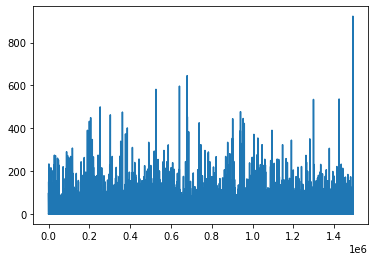

In [117]:
plt.plot(song_df['freq'])

In [118]:
song_df.freq.max()

923

In [121]:
song_df.freq.values

array([1, 1, 1, ..., 3, 1, 1], dtype=int64)

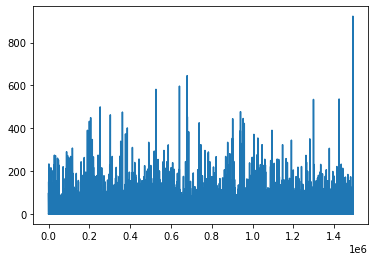

In [122]:
plt.plot(song_df.freq.values)

<AxesSubplot:xlabel='freq'>

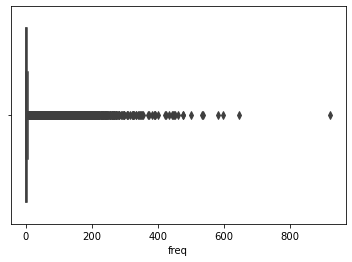

In [125]:

sns.boxplot(song_df['freq'])

In [156]:
rate1=song_df['freq']<10


In [157]:
rate1.sum()


1398789

In [154]:
rate4=song_df.freq>10

In [155]:
rate4.sum()

77449

In [15]:
song_df_['rand_freq']=song_df['freq'].sample(10000)

In [21]:
song_df2=pd.DataFrame(song_df.sample(10000))
song_df2

,user_id,song_id,freq,track_id,artist_name,release
840995,88a67be9fcc92ec45e86c7063cf4336a9c566f3e,SOLXTXN12AB018238A,3,TRNQLIN128F92FCDC6,Joe Nichols,Talk Me Out Of Tampa
478138,d18f6efb331060f06d95aa174a354f291579b5d1,SOITFCH12A6D4F9478,5,TRLZHSB128F4261650,Benny Benassi Presents The Biz,Satisfaction
1105953,e2e7f9689a0544d5b8bda4b9425e933c6d7a0bed,SOLVZKQ12AB01814C3,1,TRIPSXI128F92FD8B2,Crosby_ Stills_ Nash and Young,Almost Cut My Hair
469347,fbdedcdcb8ee68865dd0474a3617a43be238ac2d,SOZHUUI12A6701D7B6,1,TRHGJYE128E0791F71,The All-American Rejects,Swing_ Swing
306762,7117e386dc9634286f207ced37bed959be53823d,SOLRDEI12A8C13AAA2,1,TRZGLBK128F428D25D,OutKast,Ms. Jackson
...,...,...,...,...,...,...
1409427,fe1cd12db7ff9516cf4402fdab2219f4751803d8,SOPBXSS12AF729ECC1,5,TRSXERG128F93114DE,Sylvester,You Are My Friend
813495,963d6a95483ac0699141cec034769f82183295ae,SOMUFOQ12A8C1425DE,1,TRKSUQQ128F93375ED,Allen Toussaint,From A Whisper To A Scream
1039004,588279cbecad7f0bb3f6ef843fc3888f7493555b,SOSDUAW12A8C13BA7D,1,TRIMECG128F92D0147,Deadmau5,Arguru
318295,c9db916f234b6dc58284d925c56597a2eb9d34e7,SOOROCA12AF72A07D1,2,TRYIKBI128F426FFF2,Flogging Molly,If I Ever Leave This World Alive


In [59]:
for i in song_df2.index:
    if (song_df2['freq'][i]<4):
        song_df2['rating']=1
    elif ((song_df2['freq'][i]>3) & (song_df2['freq'][i]<11)):
        song_df2['rating']=2
    elif ((song_df2['freq'][i]>10) & (song_df2['freq'][i]<51)):
        song_df2['rating']=3
    elif ((song_df2['freq'][i]>50) & (song_df2['freq'][i]<151)):
        song_df2['rating']=4
    else:
        song_df2['rating']=5

In [60]:
song_df2.head()

,user_id,song_id,freq,track_id,artist_name,release,rating
840995,88a67be9fcc92ec45e86c7063cf4336a9c566f3e,SOLXTXN12AB018238A,3,TRNQLIN128F92FCDC6,Joe Nichols,Talk Me Out Of Tampa,1
478138,d18f6efb331060f06d95aa174a354f291579b5d1,SOITFCH12A6D4F9478,5,TRLZHSB128F4261650,Benny Benassi Presents The Biz,Satisfaction,1
1105953,e2e7f9689a0544d5b8bda4b9425e933c6d7a0bed,SOLVZKQ12AB01814C3,1,TRIPSXI128F92FD8B2,Crosby_ Stills_ Nash and Young,Almost Cut My Hair,1
469347,fbdedcdcb8ee68865dd0474a3617a43be238ac2d,SOZHUUI12A6701D7B6,1,TRHGJYE128E0791F71,The All-American Rejects,Swing_ Swing,1
306762,7117e386dc9634286f207ced37bed959be53823d,SOLRDEI12A8C13AAA2,1,TRZGLBK128F428D25D,OutKast,Ms. Jackson,1


In [58]:
song_df2.rating.describe()

count    10000.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: rating, dtype: float64

In [50]:
song_df2['freq'][478138]

5

In [31]:
song_df.index

dtype('int64')

In [51]:
i=478138
print((song_df2['freq'][i]<7))

True
